In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# df = pd.read_csv('Ranked_data.csv')
# # Prepare the features and target
# X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank','totalrunsscored',
#  'Total_batting_average',
#  'batting_strike_rate',
#  'totalballsfaced',
#  'totalwickets',
#  'economyrate',
#  'oversbowled_clean'], axis=1)

# # X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank'], axis=1)
# y = df['Overall_score']
# # Encode categorical variables
# le = LabelEncoder()
# X['Player_type'] = le.fit_transform(X['Player_type'])

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 0.5, 1],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }

# # Initialize SVR model
# svr = SVR()

# # Perform GridSearchCV
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_svr = grid_search.best_estimator_

# # Make predictions
# y_pred = best_svr.predict(X_test)

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")
# print(f"Accuracy: {r2 * 100:.2f}%")

# Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
# Mean Squared Error: 16.932580949419034
# R-squared Score: 0.9632246463346164
# Accuracy: 96.32%

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('Ranked_data.csv')

In [22]:
df.columns.to_list()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [23]:
# Prepare the features and target
X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank','totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean'], axis=1)

# X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank'], axis=1)
y = df['Overall_score']

In [24]:
# Encode categorical variables
le = LabelEncoder()
X['Player_type'] = le.fit_transform(X['Player_type'])

In [25]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [28]:
# Initialize SVR model
svr = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [29]:
# Get the best model
best_svr = grid_search.best_estimator_

# Make predictions
y_pred = best_svr.predict(X_test)

In [30]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Accuracy: {r2 * 100:.2f}%")

Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 16.932580949419034
R-squared Score: 0.9632246463346164
Accuracy: 96.32%


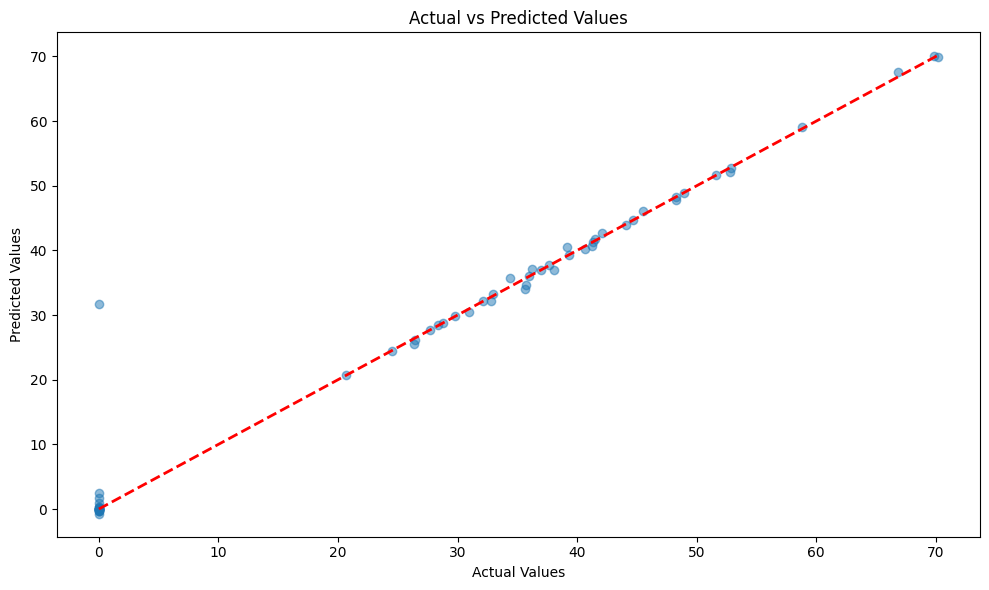

In [31]:
# Visualizations

# 1. Actual vs Predicted values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()


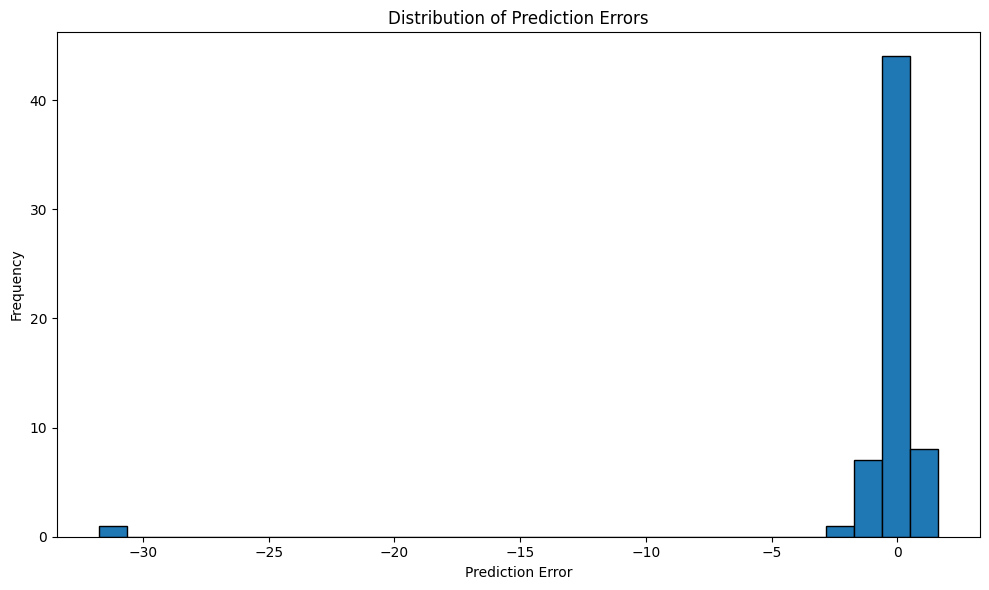

In [32]:
# 3. Prediction error distribution histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

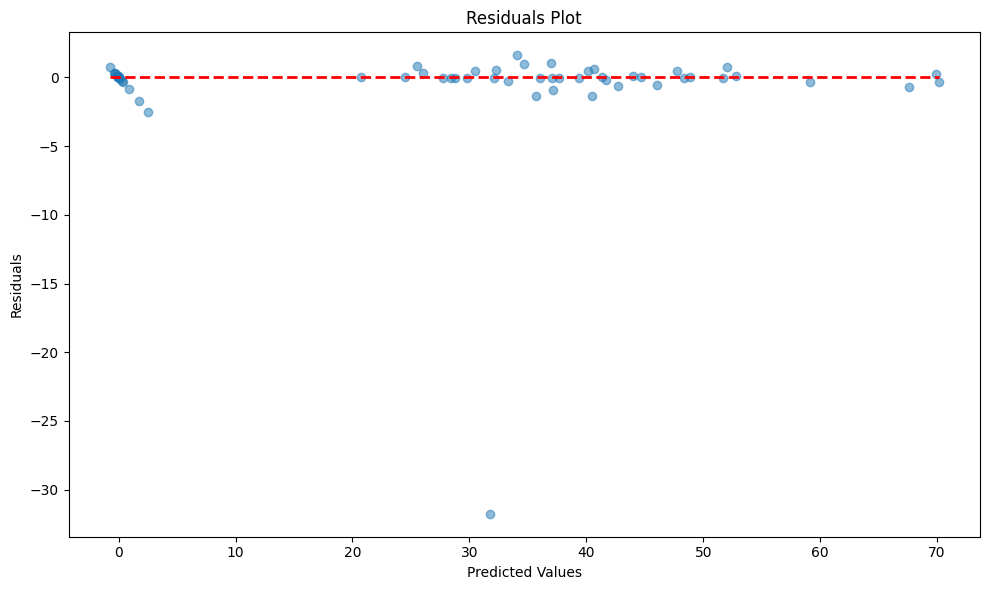

In [33]:

# 2. Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()

Loads and preprocesses the data, including encoding categorical variables and scaling features.
Splits the data into training and testing sets.
Uses GridSearchCV to find the best hyperparameters for the SVR model.
Trains the model with the best hyperparameters.
Makes predictions and calculates performance metrics (MSE, R-squared, and Accuracy).
Creates visualizations to help interpret the results.
The SVR model might provide different insights into your data compared to the previous models. It's particularly good at handling non-linear relationships and can be robust to outliers when properly tuned.
After running this code, you'll see the best parameters found by GridSearchCV, the model's performance metrics, and visualizations of the results. You can compare these results with your previous models to see if SVR provides any improvements or different insights for your cricket player performance prediction task.

In [34]:
# Sample data for prediction
sample_data = pd.DataFrame({
    'totalrunsscored_norm': [0.53, 0.22, 0.04, 0.35, 0.13],
    'Total_batting_average_norm': [0.65, 0.43, 0.22, 0.55, 0.36],
    'batting_strike_rate_norm': [0.47, 0.42, 0.33, 0.45, 0.38],
    'totalwickets_norm': [0.02, 0.12, 0.48, 0.18, 0.30],
    'economyrate_norm': [0.72, 0.68, 0.82, 0.78, 0.75],
    'Player_type': ['Batsman', 'All-rounder', 'Bowler', 'All-rounder', 'Bowler']
})

# Encode 'Player_type'
sample_data['Player_type'] = le.transform(sample_data['Player_type'])

# Scale the features
sample_data_scaled = scaler.transform(sample_data)

# Make predictions
sample_predictions = best_svr.predict(sample_data_scaled)

# Add predictions to the sample data
sample_data['Predicted_Overall_score'] = sample_predictions

# Display results
print("\nSample Data Predictions:")
print(sample_data[['Predicted_Overall_score']])


Sample Data Predictions:
   Predicted_Overall_score
0                51.689517
1                34.748582
2                57.962490
3                42.833112
4                45.804474
